In [1]:
import cv2
import matplotlib.pyplot as plt

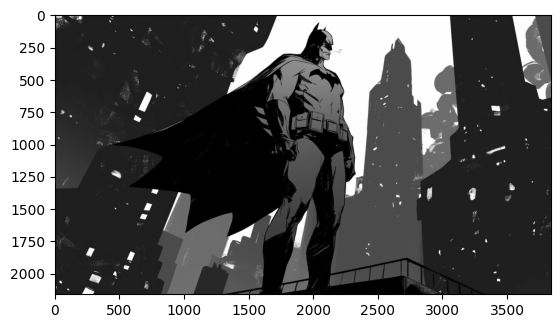

In [3]:
img = cv2.imread(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# cv2.imshow("image",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

In [ ]:
##pillow 
from PIL import Image
img1 = Image.open(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
img1.show()
# img1.save("batman.jpg")
print(img.shape) # height, width, channel
print(img.size) #total number of pixel
print(img.dtype) 

(2160, 3840, 3)
24883200
uint8


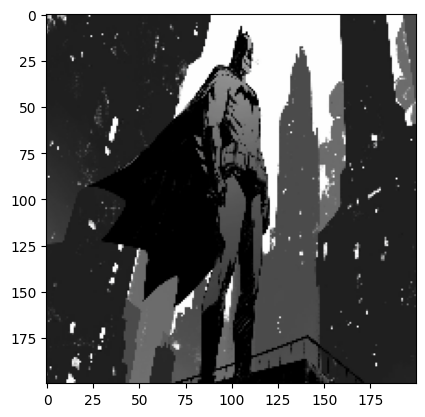

In [ ]:
##scaling --chnages the size of an image either enlarging or shrinking
##scaled = cv2.resize(img,(new_width,new_height))
# scaled_image=cv2.resize(img,(200,200))
scaled_image = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
#img = image 
#0,0 -- you are not making any changes
#fx , fy -- scaling factor
#0.5 times of your original height and width
## 200 * 0.5 = 100
plt.imshow(scaled_image)


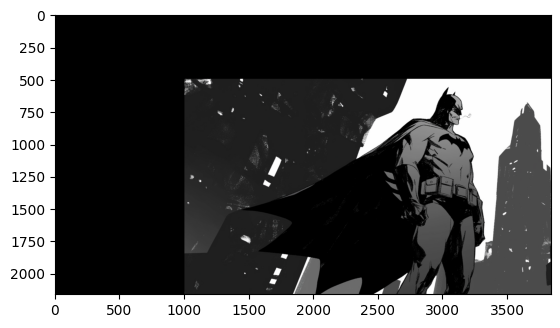

In [ ]:
##translation -- chnages the location of an image on the screen 
import numpy as np
rows , cols = img.shape[:2]
tx , ty = 1000, 500 #translation factor
##affine translation matrix 
M = np.float32([[1,0,tx],[0,1,ty]])
# [1,0,tx]
##1 -- keep the x coordinates same
##0 -- dont change the y coordinates
##tx -- translation factor

translated_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(translated_image)

new = 1 *x + 0 *y + tx


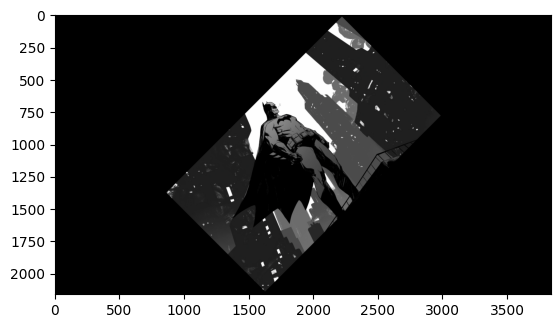

In [ ]:
##rotatio n 
center = (cols//2,rows//2) #center of the image
angle = 45
scale = 0.5
#scale -- zoom in and zoom out
##1 == original image , <1 = zoom out , >1 = zoom in
M = cv2.getRotationMatrix2D(center,angle,scale)
#affine -- translation , roatation , scale , shearing 
rotated_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_image)

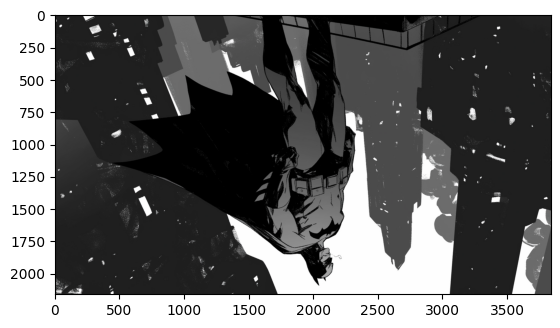

In [13]:
#flipping -- mirror image 
flip_image = cv2.flip(img,0)
##flip code = 0 -- flip vertically
##flip code = 1 -- flip horizontally
##flip code = -1 -- flip both
plt.imshow(flip_image)

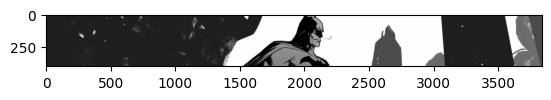

In [18]:
##cropping an Image --- slicing an array 
crooped_image = img[100:500,:]
plt.imshow(crooped_image)


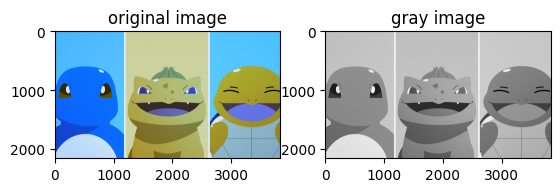

In [ ]:
##RGB image to grayscale conversionn 
img2 = cv2.imread(r"D:\c data\06-05-25 download\pokemon-starters-trio-desktop-wallpaper.jpg")
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#gray = 0.3R + 0.59G + 0.11B
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(gray,cmap="gray")
plt.title("gray image")
plt.show()

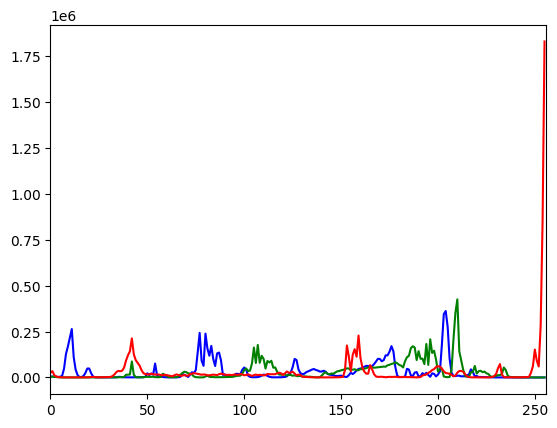

In [ ]:
##histograms -- distribution of pixel intensity values 
color = ("b","g","r")
for i , col in enumerate(color):
    # plt.subplot(1,3,i+1)
    ##i = channel index values 0 , 1 , 2 
    #none = mask -- we are computing the histogram of the entire image
    #256 = number of bins
    #0,256 range of pixel
    hist = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
##erosion -- remove white pixels from the boundary of an object 
##dilation -- opp of erosion

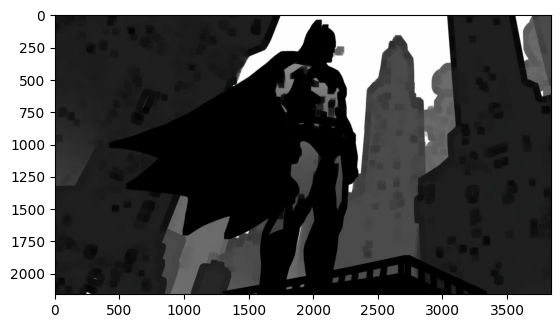

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=10)
dilate = cv2.dilate(img,kernel,iterations=10)
plt.imshow(erosion,cmap="gray")